In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# === Load data ===
df = pd.read_csv("D:/Downloads/train.csv")

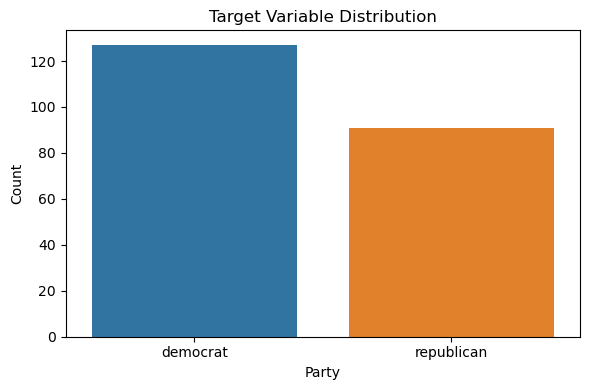

In [5]:
# === 2. Target variable distribution ===
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df)
plt.title("Target Variable Distribution")
plt.xlabel("Party")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [8]:
# === 3. Feature type analysis ===
text_cols = df.select_dtypes(include='object').columns.tolist()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [9]:
# Remove target from lists
if 'class' in text_cols:
    text_cols.remove('class')
if 'class' in numeric_cols:
    numeric_cols.remove('class')

In [10]:
# Show types
print(f"Total features (excluding target): {len(df.columns) - 2}")  # subtract class and ID
print(f"Numerical features: {len(numeric_cols)} -> {numeric_cols}")
print(f"Categorical features: {len(text_cols)} -> {text_cols}")
print(f"Text features: 0 (no free-form text columns)")

Total features (excluding target): 16
Numerical features: 1 -> ['ID']
Categorical features: 16 -> ['handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 'religious-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile', 'immigration', 'synfuels-crporation-cutback', 'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free-exports', 'export-administration-act-south-africa']
Text features: 0 (no free-form text columns)


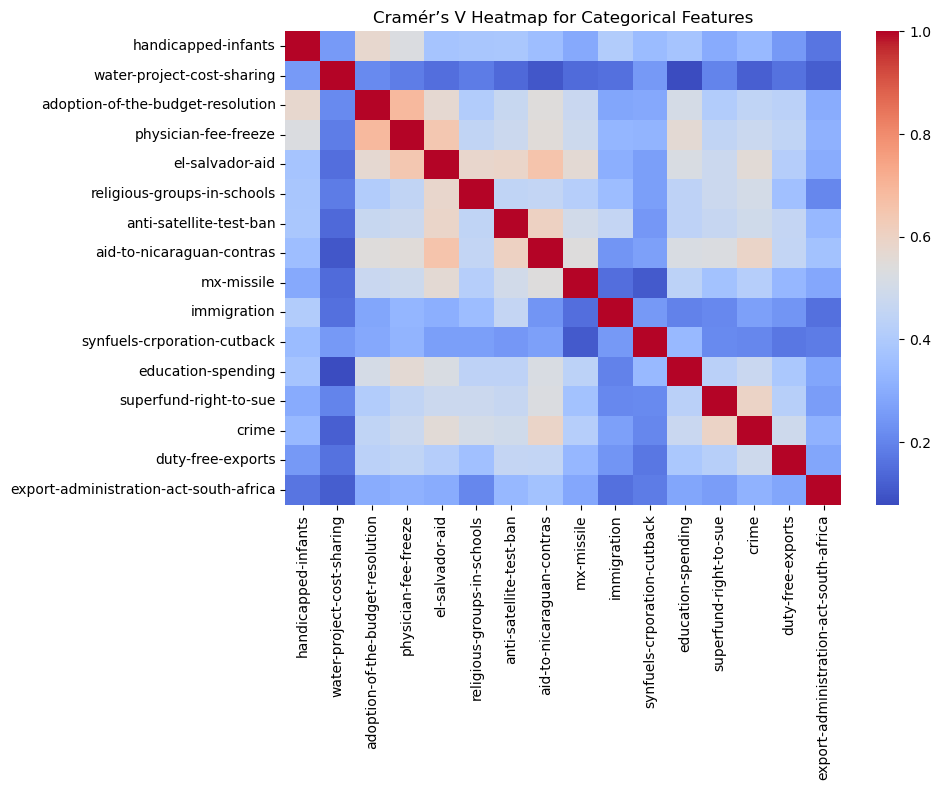

In [13]:
import scipy.stats as stats
import numpy as np
import pandas as pd

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k - 1, r - 1))))

# Compute pairwise Cramér’s V between all categorical columns
categorical = df.select_dtypes(include='object').drop(columns=['class'])
cramers_results = pd.DataFrame(index=categorical.columns, columns=categorical.columns)

for col1 in categorical.columns:
    for col2 in categorical.columns:
        if col1 == col2:
            cramers_results.loc[col1, col2] = 1.0
        else:
            cramers_results.loc[col1, col2] = cramers_v(df[col1], df[col2])

cramers_results = cramers_results.astype(float)

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_results, annot=False, cmap="coolwarm")
plt.title("Cramér’s V Heatmap for Categorical Features")
plt.tight_layout()
plt.show()
